# Capstone Project - 2

Data set : Online Retail

Problem Statement : An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

# SECTION I - IMPORTING LIBRARIES

In [23]:
import numpy as np      # To use np.arrays
import pandas as pd 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#For modeling
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# SECTION - II - Loading the dataset

In [25]:
retail=pd.read_csv('OnlineRetailcap.csv',encoding= 'unicode_escape')

# SECTION - III DATA EXPLORATION

In [26]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [27]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [28]:
retail.shape

(541909, 8)

In [29]:
retail['Description'].nunique()

4223

In [30]:
retail['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [31]:
retail['Country'].nunique()

38

In [32]:
data=retail #just creating a duplicate

# SECTION - IV Data Cleaning

In [33]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()

In [34]:
# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [35]:
#Checking of rows and Columns
rows = len(retail.axes[0])
columns = len(retail.axes[1])

print("Number of Rows:",rows)
print("Number of Columns:",columns)

Number of Rows: 541909
Number of Columns: 8


In [36]:
 retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

As you can see, there are 1454 null values in Description Column while CustomerID containts 135080 null values. We gonna replace null values in Description with 'None' and '0' in CustomerID. We cannot have null values especially in customerID because it is important to our transaction analysis. Also, I add another column 'Status' to identify the transaction if its succesfull or Cancelled.

In [37]:
#Data Cleaning and Manipulation
retail['Cancelled'] = retail['InvoiceNo'].str.find('C', start = 0)#if its true = 0 then false = -1
retail['Description'] = retail['Description'].fillna('None')
retail['Description'] = retail['Description'].str.strip()
retail['CustomerID'] = retail['CustomerID'].fillna('0')

In [38]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Cancelled      0
dtype: int64

In [39]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
 8   Cancelled    541909 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 37.2+ MB


In [40]:
#Data Cleaning and Manipulaton 
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['Year'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%Y')
retail['Month'] = pd.to_datetime(retail['InvoiceDate']).dt.strftime('%m')
retail['CustomerID'] = retail['CustomerID'].astype(int)
retail['Total_Sales'] = retail['Quantity']*retail['UnitPrice']

In [41]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
 8   Cancelled    541909 non-null  int64         
 9   Year         541909 non-null  object        
 10  Month        541909 non-null  object        
 11  Total_Sales  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(6)
memory usage: 47.5+ MB


Text(0.5, 1.0, 'Top 5 Countries with most sales ')

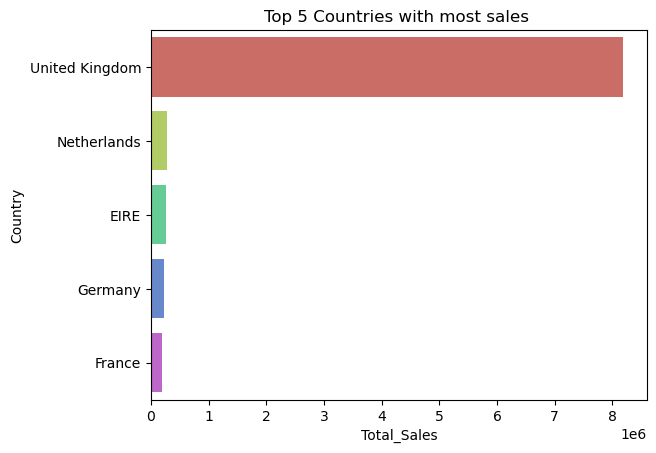

In [42]:
#Analysis and Visualization

total_sales_per_country = retail.groupby('Country')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_country.head(5), x='Total_Sales',y='Country',palette = 'hls')
plt.title("Top 5 Countries with most sales ")

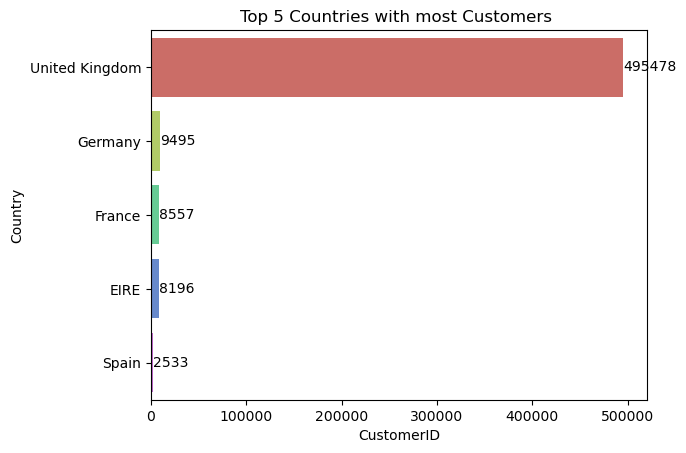

In [43]:
total_customer_per_country = retail.groupby('Country')['CustomerID'].count().reset_index().sort_values('CustomerID',ascending=False)
z = sns.barplot(data=total_customer_per_country.head(5), x='CustomerID',y='Country',palette = 'hls')
plt.title("Top 5 Countries with most Customers ")
for i in z.containers:
    z.bar_label(i,)

Text(0.5, 1.0, 'Sales per Year ')

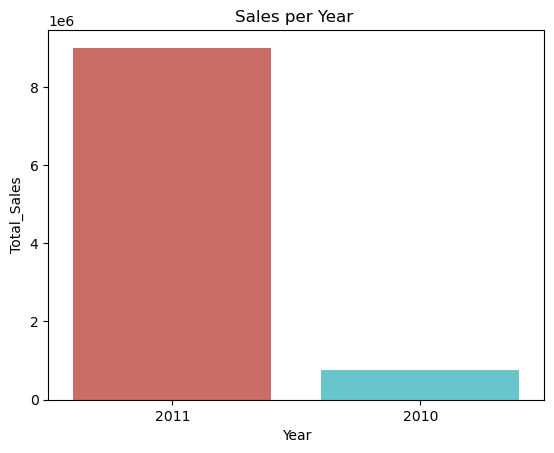

In [44]:
total_sales_per_year = retail.groupby('Year')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_year, x='Year',y='Total_Sales',palette = 'hls')
plt.title("Sales per Year ")

Text(0.5, 1.0, 'Sales per Month')

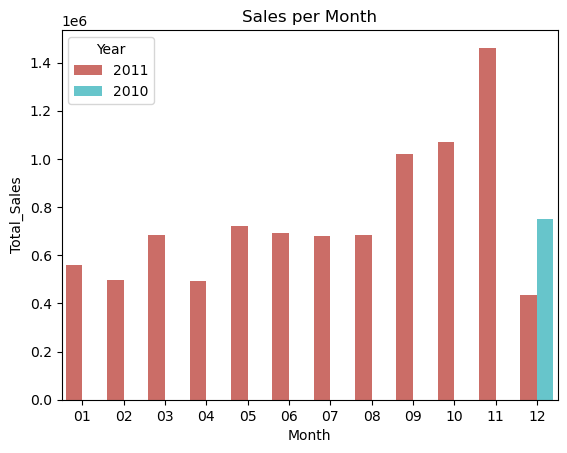

In [45]:
total_sales_per_month = retail.groupby(['Month','Year'])['Total_Sales'].sum().reset_index()
z = sns.barplot(data=total_sales_per_month, y='Total_Sales',x='Month',hue='Year',palette = 'hls')
plt.title("Sales per Month")

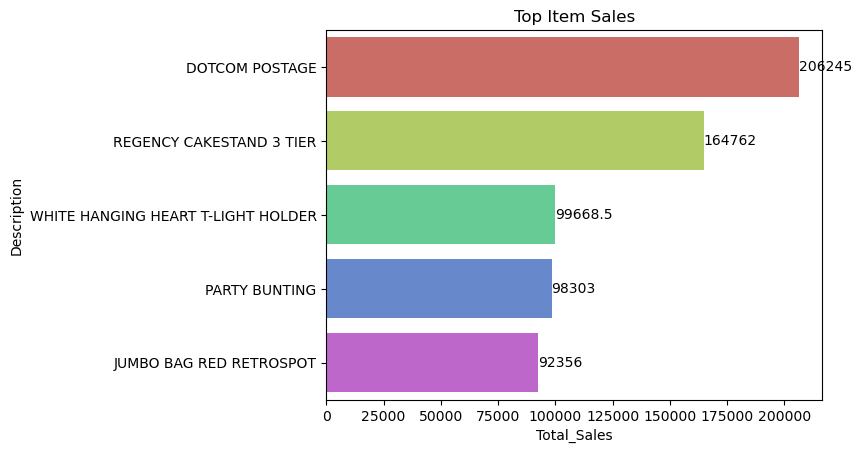

In [46]:
total_sales_per_category = retail.groupby('Description')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_category.head(5), y='Description',x='Total_Sales',palette = 'hls')
plt.title("Top Item Sales")
for i in z.containers:
    z.bar_label(i,)

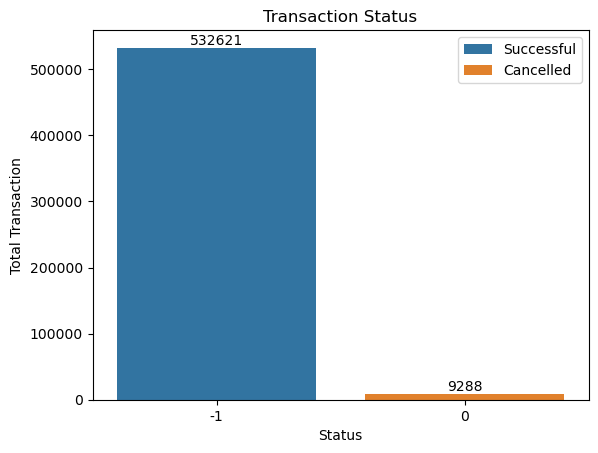

In [47]:
#total_cancelled = retail.groupby(['Cancelled']).count().reset_index()
z = sns.countplot(x=retail['Cancelled'], hue = retail['Cancelled'], dodge=False )
plt.ylabel("Total Transaction")
plt.xlabel("Status")
plt.title("Transaction Status")
labels = ["Successful","Cancelled"]
z.legend(labels)
for i in z.containers:
    z.bar_label(i,)

# SECTION VI - RFM

In [48]:
df1=pd.read_csv('OnlineRetailcap.csv',encoding= 'unicode_escape')

We are going to analysis the Customers based on below 3 factors: R (Recency): Number of days since last purchase F (Frequency): Number of tracsactions M (Monetary): Total amount of transactions (revenue contributed

In [49]:
from datetime import datetime
import datetime as dt

date_string = '2022-09-19 13:55:26'
date_format = '%Y-%m-%d %H:%M:%S'
datetime_object = datetime.strptime(date_string, date_format)

In [50]:
freq1 = df1.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})


freq1

,Frequency
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


In [51]:
#Monetory
df1["TotalPrice"] = df1["Quantity"] * df1["UnitPrice"]


monetary1 = df1.groupby("CustomerID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})


monetary1.head()

,Monetary
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [52]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())

2009-2010: Min Date 1/10/2011 10:04 Max Date 9/9/2011 9:52


In [53]:
# Convert the 'InvoiceDate' column to datetime objects
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

# Perform the subtraction
recency1 = (dt.datetime(2011, 9, 9) - df1.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

In [54]:
recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)

In [55]:
recency1.head()

,Recency
CustomerID,
12346.0,233
12347.0,-90
12348.0,-17
12349.0,-74
12350.0,218


Create RFM Score

In [56]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,233,2,0.00
12347.0,-90,7,4310.00
12348.0,-17,4,1797.24
12349.0,-74,1,1757.55
12350.0,218,1,334.40


In [57]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])

In [58]:
rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

In [59]:
rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [60]:
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.0,233,2,0.00,1,2,1
12347.0,-90,7,4310.00,5,4,5
12348.0,-17,4,1797.24,2,3,4
12349.0,-74,1,1757.55,4,1,4
12350.0,218,1,334.40,1,1,2


# TYPES OF CUSTOMERS CLUSTERING- TYPE I

In [62]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

In [63]:
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.0,233,2,0.00,1,2,1,121
12347.0,-90,7,4310.00,5,4,5,545
12348.0,-17,4,1797.24,2,3,4,234
12349.0,-74,1,1757.55,4,1,4,414
12350.0,218,1,334.40,1,1,2,112


In [64]:
rfm2=rfm1

In [65]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [66]:
rfm2['Segment'] = rfm2['RecencyScore'].astype(str) + rfm2['FrequencyScore'].astype(str)
rfm2['Segment'] = rfm2['Segment'].replace(seg_map, regex=True)
rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.0,233,2,0.00,1,2,1,121,Hibernating
12347.0,-90,7,4310.00,5,4,5,545,Champions
12348.0,-17,4,1797.24,2,3,4,234,At Risk
12349.0,-74,1,1757.55,4,1,4,414,Promising
12350.0,218,1,334.40,1,1,2,112,Hibernating


In [67]:
rfmStats1 = rfm2[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,-39.902703,-40.0,370,11.083876,1.289189,1.0,370,0.454000,435.288000,327.195,370,469.288605
At Risk,65.541254,49.0,606,72.715482,3.313531,3.0,606,1.224022,948.964228,632.780,606,1322.564937
Can't Loose,42.848485,15.0,66,67.492505,9.803030,8.0,66,4.199706,2431.869848,1891.295,66,1961.591699
Champions,-86.924812,-88.0,665,3.449341,14.445113,9.0,665,19.374801,6510.544000,2531.580,665,19403.818771
Hibernating,125.185361,126.0,1052,92.056755,1.202471,1.0,1052,0.402033,376.141493,266.685,1052,526.393849
Loyal Customers,-59.635220,-64.0,795,16.033820,7.938365,6.0,795,5.641246,2706.464693,1708.860,795,5429.172902
Need Attention,-43.470588,-46.0,187,11.543417,2.631016,3.0,187,0.483825,774.944225,598.830,187,599.337540
New Customers,-85.761905,-85.0,42,3.701084,1.000000,1.0,42,0.000000,377.234286,246.810,42,574.982985
Potential Loyalists,-76.386179,-76.0,492,9.310947,2.213415,2.0,492,0.682322,683.793821,486.300,492,852.445376


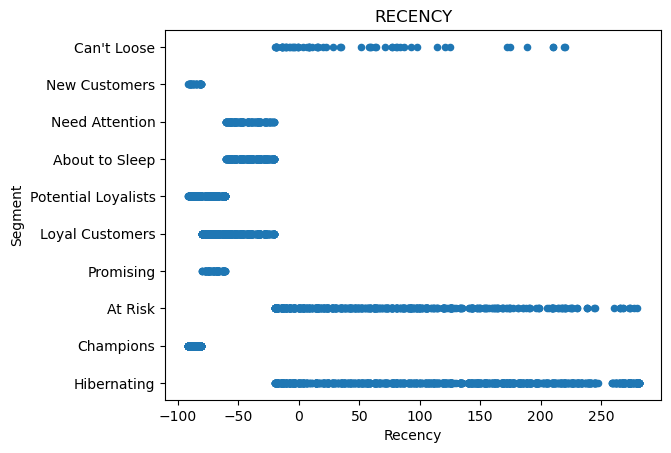

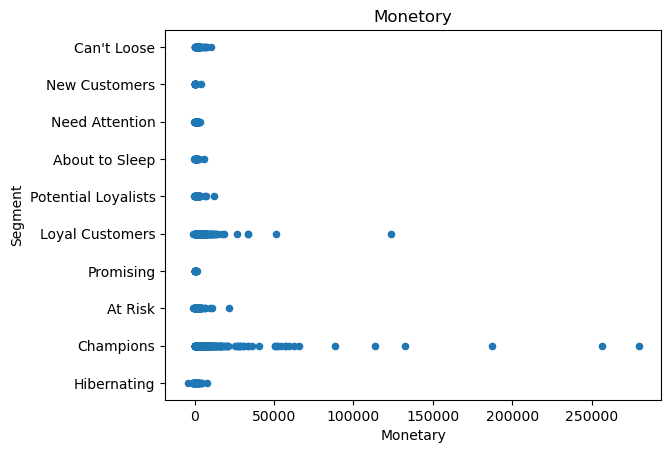

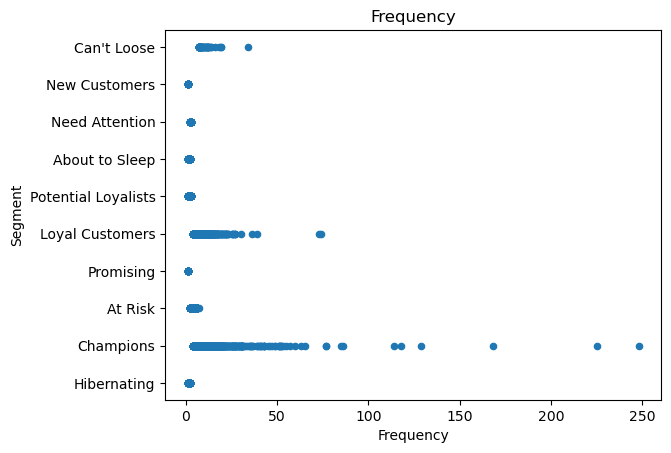

In [69]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'Recency' vs 'Segment'
rfm1.plot(x='Recency', y='Segment', kind='scatter')
plt.title('RECENCY')
plt.show()

# Create a scatter plot of 'Monetary' vs 'Segment'
rfm1.plot(x='Monetary', y='Segment', kind='scatter')
plt.title('Monetory')
plt.show()

# Create a scatter plot of 'Frequency' vs 'Segment'
rfm1.plot(x='Frequency', y='Segment', kind='scatter')
plt.title('Frequency')
plt.show()

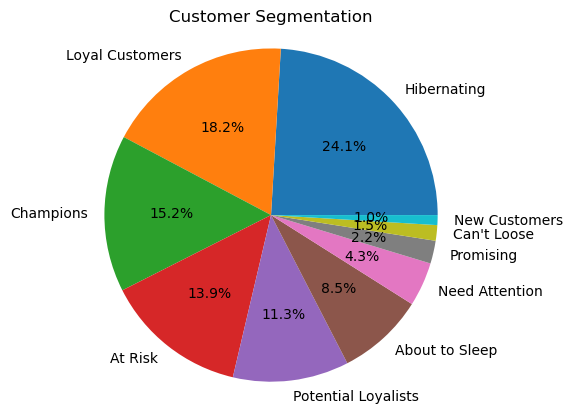

In [70]:
segment_counts = rfm2['Segment'].value_counts()

# Create a pie chart
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.axis('equal') 
plt.show()

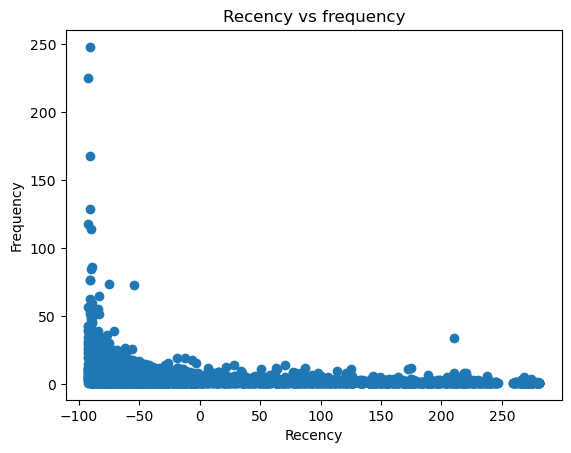

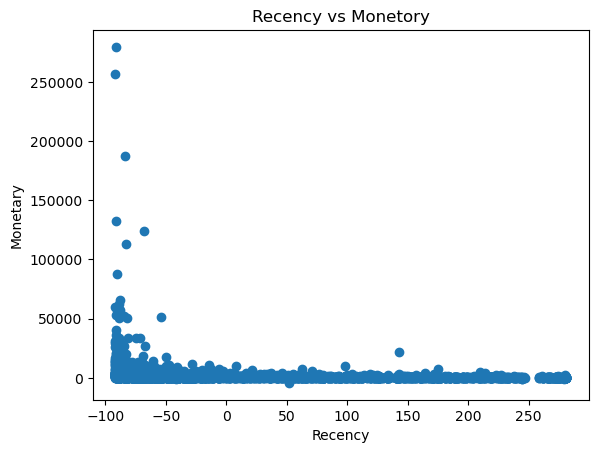

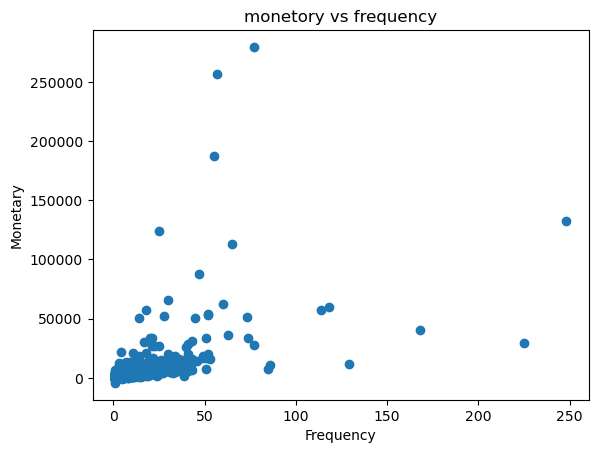

In [71]:
# Create a scatter plot of 'Recency' vs 'Frequency'
plt.scatter(rfm2['Recency'], rfm2['Frequency'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs frequency')
plt.show()

# Create a scatter plot of 'Recency' vs 'Monetary'
plt.scatter(rfm1['Recency'], rfm1['Monetary'])
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetory')
plt.show()

# Create a scatter plot of 'Frequency' vs 'Monetary'
plt.scatter(rfm1['Frequency'], rfm1['Monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('monetory vs frequency')
plt.show()

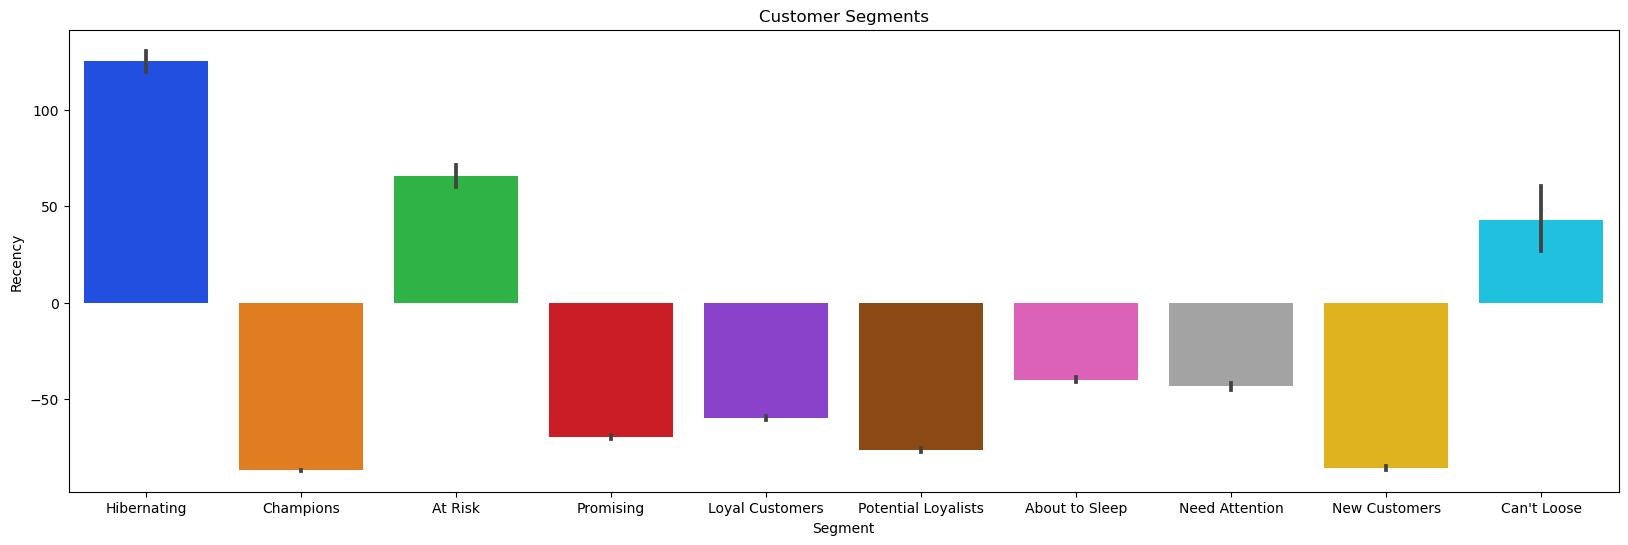

In [111]:
# set figure size
plt.figure(figsize=(20, 6))

# create bar plot
sns.barplot(x=rfm1["Segment"], y=rfm1["Recency"], palette="bright")
plt.title('Customer Segments')
plt.show()

Inferecnce: Customer whose frequency is high is often spending more money in purchasing the products Customer whose frequency is less is spending less money in purchasing the products

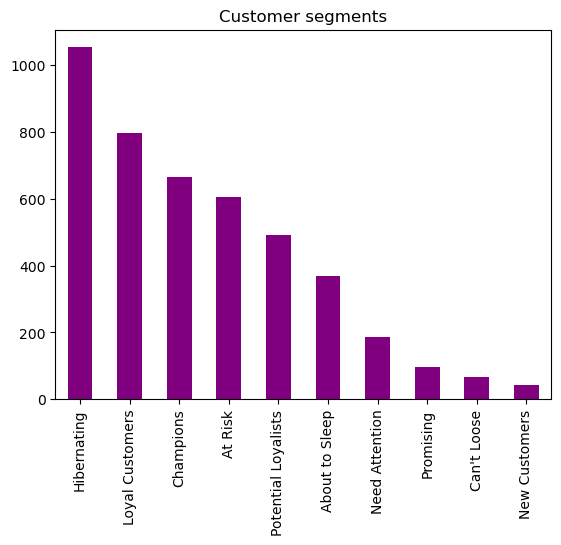

In [88]:
# create bar plot with color
rfm1['Segment'].value_counts().plot(kind='bar', color='purple')
plt.title('Customer segments')
plt.show()

# RFM CUSTOMER SEGMENT - TYPE II

In [89]:
RFM=rfm1[['Recency','Frequency','Monetary']]
RFM


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,233,2,0.00
12347.0,-90,7,4310.00
12348.0,-17,4,1797.24
12349.0,-74,1,1757.55
12350.0,218,1,334.40
...,...,...,...
18280.0,185,1,180.60
18281.0,88,1,80.82
18282.0,-85,3,176.60


In [90]:
RFM['R_Rank']= RFM['Recency'].rank(ascending=False)
RFM['F_Rank']= RFM['Frequency'].rank(ascending=True)
RFM['M_Rank']= RFM['Monetary'].rank(ascending=True)

C:\Users\Suba\AppData\Local\Temp\ipykernel_11000\3686635900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R_Rank']= RFM['Recency'].rank(ascending=False)
C:\Users\Suba\AppData\Local\Temp\ipykernel_11000\3686635900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['F_Rank']= RFM['Frequency'].rank(ascending=True)
C:\Users\Suba\AppData\Local\Temp\ipykernel_11000\3686635900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [91]:
RFM

,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank
CustomerID,,,,,,
12346.0,233,2,0.00,169.0,1723.5,46.5
12347.0,-90,7,4310.00,4171.0,3566.0,4054.0
12348.0,-17,4,1797.24,1642.5,2811.5,3394.0
12349.0,-74,1,1757.55,3177.5,657.5,3366.0
12350.0,218,1,334.40,238.0,657.5,1297.0
...,...,...,...,...,...,...
18280.0,185,1,180.60,365.0,657.5,625.0
18281.0,88,1,80.82,864.0,657.5,159.0
18282.0,-85,3,176.60,3829.0,2377.5,598.5


In [92]:
RFM['R_rank_norm']=(RFM['R_Rank']/RFM['R_Rank'].max())*100
RFM['F_rank_norm']=(RFM['F_Rank']/RFM['F_Rank'].max())*100
RFM['M_rank_norm']=(RFM['M_Rank']/RFM['M_Rank'].max())*100

C:\Users\Suba\AppData\Local\Temp\ipykernel_11000\3663024562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['R_rank_norm']=(RFM['R_Rank']/RFM['R_Rank'].max())*100
C:\Users\Suba\AppData\Local\Temp\ipykernel_11000\3663024562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['F_rank_norm']=(RFM['F_Rank']/RFM['F_Rank'].max())*100


In [93]:
RFM.drop(columns=['R_Rank','F_Rank','M_Rank'],inplace=True)

In [94]:
RFM['RFM_SCORE']=0.15*RFM['R_rank_norm'] +0.28* RFM['F_rank_norm']+0.57*RFM['M_rank_norm']

In [95]:
RFM['RFM_SCORE'] *=  0.05

In [96]:
RFM[['RFM_SCORE']].sort_values(by='RFM_SCORE' ,ascending=False)

,RFM_SCORE
CustomerID,
18102.0,4.994545
15311.0,4.992852
14911.0,4.984779
14646.0,4.984013
12748.0,4.982731
...,...
12666.0,0.234463
17307.0,0.229947
16252.0,0.226662


In [97]:
RFM['Customer_Segments']= np.where(RFM['RFM_SCORE']>4.5,'Top_Customers',
                                   np.where(RFM['RFM_SCORE']>4,'High_Value_Customers',
                                            np.where(RFM['RFM_SCORE']>3,'Medium_Value_Customers',
                                                     np.where(RFM['RFM_SCORE']>1.6,'Low_ValueCustomers', 'Lost_Customers'))))

In [98]:
RFM[['RFM_SCORE','Customer_Segments']]

,RFM_SCORE,Customer_Segments
CustomerID,,
12346.0,0.611325,Lost_Customers
12347.0,4.503166,Top_Customers
12348.0,3.395725,Medium_Value_Customers
12349.0,2.952162,Low_ValueCustomers
12350.0,1.097028,Lost_Customers
...,...,...
18280.0,0.680847,Lost_Customers
18281.0,0.463038,Lost_Customers
18282.0,1.811111,Low_ValueCustomers


In [99]:
RFM_=RFM[['Recency','Frequency','Monetary','Customer_Segments','RFM_SCORE']]
RFM_

,Recency,Frequency,Monetary,Customer_Segments,RFM_SCORE
CustomerID,,,,,
12346.0,233,2,0.00,Lost_Customers,0.611325
12347.0,-90,7,4310.00,Top_Customers,4.503166
12348.0,-17,4,1797.24,Medium_Value_Customers,3.395725
12349.0,-74,1,1757.55,Low_ValueCustomers,2.952162
12350.0,218,1,334.40,Lost_Customers,1.097028
...,...,...,...,...,...
18280.0,185,1,180.60,Lost_Customers,0.680847
18281.0,88,1,80.82,Lost_Customers,0.463038
18282.0,-85,3,176.60,Low_ValueCustomers,1.811111


In [100]:
# Means of RFM Segments

RFM_Means=RFM_.groupby('Customer_Segments').mean()
RFM_Means

,Recency,Frequency,Monetary,RFM_SCORE
Customer_Segments,,,,
High_Value_Customers,-70.246445,9.625592,3307.642536,4.235016
Lost_Customers,77.109225,1.273063,198.927285,0.993985
Low_ValueCustomers,-4.442152,2.525424,641.028232,2.289512
Medium_Value_Customers,-48.068596,5.354770,1616.018212,3.494364
Top_Customers,-84.570492,25.652459,13957.619311,4.715843


In [101]:
# Size of Segments

segment_size=RFM_.groupby('Customer_Segments').agg(SegmentSize=('Recency','count')).eval('SegmentProp= SegmentSize/SegmentSize.sum()')
segment_size.sort_values(by='SegmentSize',ascending=False)

,SegmentSize,SegmentProp
Customer_Segments,,
Low_ValueCustomers,1357,0.310384
Lost_Customers,1355,0.309927
Medium_Value_Customers,933,0.213403
High_Value_Customers,422,0.096523
Top_Customers,305,0.069762


In [102]:
segments_table=df1.merge(RFM,left_on='CustomerID',right_index=True)
segments_table.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_SCORE,Customer_Segments
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,210,34,5288.63,6.155966,98.890668,94.487649,4.123537,High_Value_Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,210,34,5288.63,6.155966,98.890668,94.487649,4.123537,High_Value_Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,210,34,5288.63,6.155966,98.890668,94.487649,4.123537,High_Value_Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,210,34,5288.63,6.155966,98.890668,94.487649,4.123537,High_Value_Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,210,34,5288.63,6.155966,98.890668,94.487649,4.123537,High_Value_Customers


In [103]:
segments_table1= segments_table.drop(columns=['Recency','Frequency','Monetary','R_rank_norm','F_rank_norm','M_rank_norm'])
segments_table1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,RFM_SCORE,Customer_Segments
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,4.123537,High_Value_Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4.123537,High_Value_Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,4.123537,High_Value_Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4.123537,High_Value_Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,4.123537,High_Value_Customers


In [104]:
table1=segments_table1.groupby(['Customer_Segments','Description'],as_index=False).agg(QuantityBought=('Quantity','sum'))
table1

,Customer_Segments,Description,QuantityBought
0,High_Value_Customers,4 PURPLE FLOCK DINNER CANDLES,18
1,High_Value_Customers,50'S CHRISTMAS GIFT BAG LARGE,258
2,High_Value_Customers,DOLLY GIRL BEAKER,246
3,High_Value_Customers,I LOVE LONDON MINI BACKPACK,41
4,High_Value_Customers,NINE DRAWER OFFICE TIDY,17
...,...,...,...
16654,Top_Customers,ZINC T-LIGHT HOLDER STARS SMALL,2482
16655,Top_Customers,ZINC TOP 2 DOOR WOODEN SHELF,4
16656,Top_Customers,ZINC WILLIE WINKIE CANDLE STICK,878
16657,Top_Customers,ZINC WIRE KITCHEN ORGANISER,8


In [105]:
Top5Purchases=table1.sort_values(["Customer_Segments", "QuantityBought"],ascending=[True, False]).groupby("Customer_Segments").head(5).set_index("Customer_Segments")
Top5Purchases.reset_index(inplace=True)

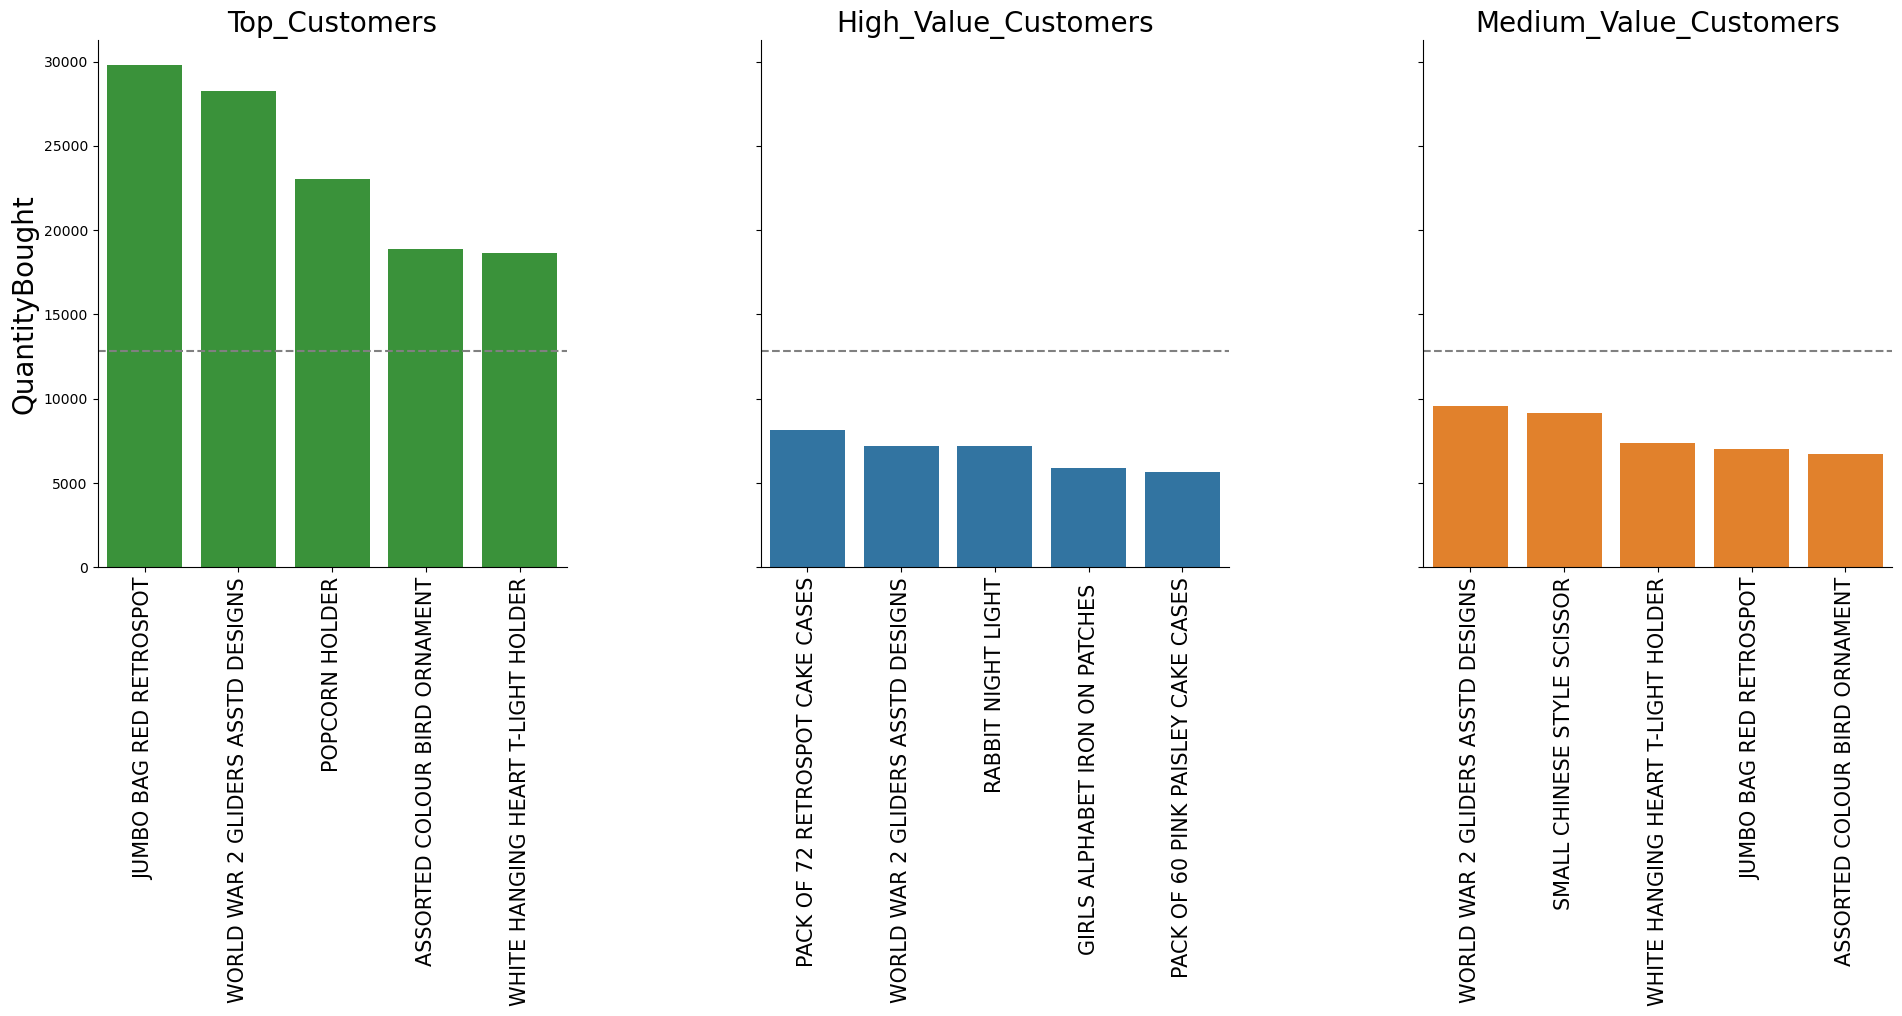

In [106]:
temp =Top5Purchases[Top5Purchases['Customer_Segments'].isin(['Top_Customers','High_Value_Customers','Medium_Value_Customers'])]

g=sns.FacetGrid(temp,col='Customer_Segments',sharex=False,aspect=1.1,height=6,col_wrap=3,hue='Customer_Segments',col_order=['Top_Customers','High_Value_Customers','Medium_Value_Customers'])
g.map_dataframe(sns.barplot,x='Description',y='QuantityBought')
g.set_axis_labels('')
g.refline(y=temp['QuantityBought'].mean())               # Creating the mean line
g.set_titles(col_template='{col_name}',size=20)
g.set_xticklabels(rotation=90,fontsize=15)
g.set_ylabels(size=20);
plt.show()

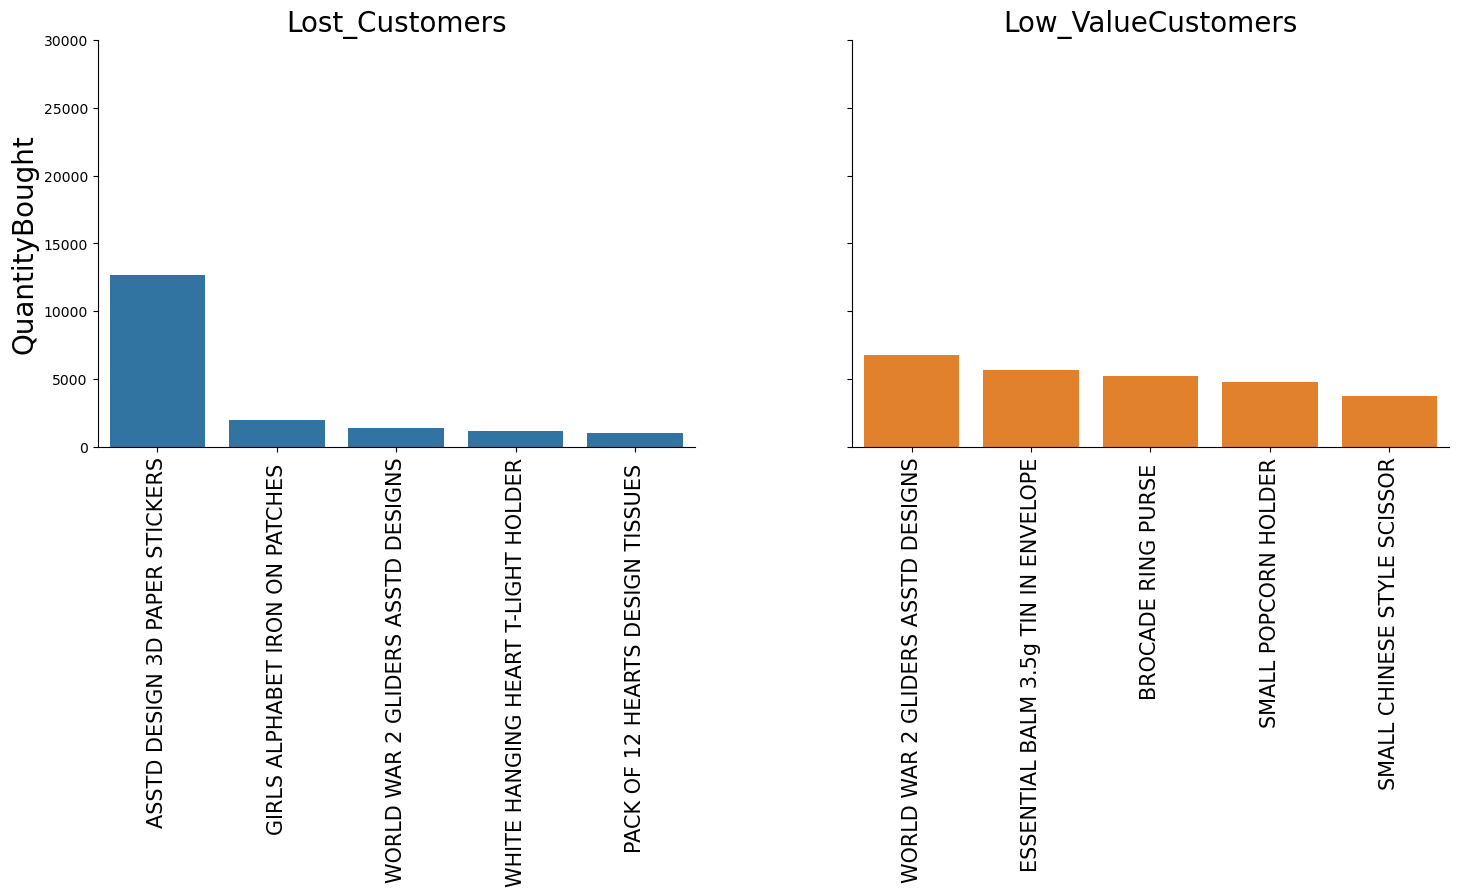

In [107]:
temp1 =Top5Purchases[Top5Purchases['Customer_Segments'].isin(['Lost_Customers', 'Low_ValueCustomers'])]

g=sns.FacetGrid(temp1,col='Customer_Segments',sharex=False,ylim=(0,30000),aspect=1.5,height=5,col_wrap=2,hue='Customer_Segments',col_order=['Lost_Customers', 'Low_ValueCustomers'])

g.map_dataframe(sns.barplot,x='Description',y='QuantityBought')
g.set_axis_labels('')
g.set_titles(col_template='{col_name}',size=20)
g.set_xticklabels(rotation=90,fontsize=15)
g.set_ylabels(size=20);
plt.show()

# SECTION V-  MODEL BUILDING USING KMeans

In [114]:
# Rescaling the attributes

rfm_df = rfm1[['Recency','Frequency','Monetary']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4372, 3)

In [115]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,2.316568,-0.328714,-0.231001
1,-0.889050,0.211970,0.293432
2,-0.164560,-0.112440,-0.012316
3,-0.730258,-0.436851,-0.017146
4,2.167700,-0.436851,-0.190312


K-means clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

In [116]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k

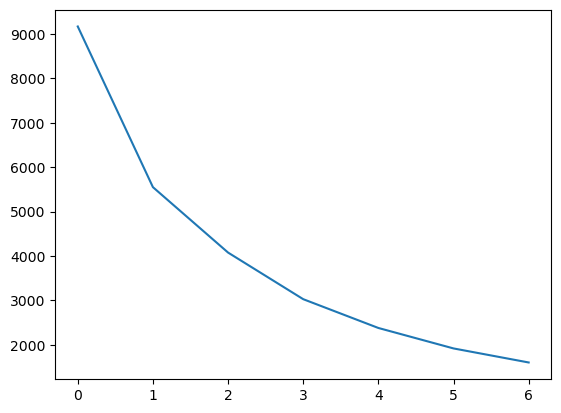

In [117]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [118]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9012601969872885
For n_clusters=3, the silhouette score is 0.5863978241984316
For n_clusters=4, the silhouette score is 0.6104692016852675
For n_clusters=5, the silhouette score is 0.614388997253775
For n_clusters=6, the silhouette score is 0.5783926979268867
For n_clusters=7, the silhouette score is 0.51638440859936
For n_clusters=8, the silhouette score is 0.4911190221744122


In [173]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [174]:
# assign the label
rfm1['Cluster_Id'] = kmeans.labels_
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Cluster_Id,Cluster_Labels
CustomerID,,,,,,,,,,
12346.0,233,2,0.00,1,2,1,121,Hibernating,0,0
12347.0,-90,7,4310.00,5,4,5,545,Champions,2,0
12348.0,-17,4,1797.24,2,3,4,234,At Risk,2,0
12349.0,-74,1,1757.55,4,1,4,414,Promising,2,0
12350.0,218,1,334.40,1,1,2,112,Hibernating,0,0


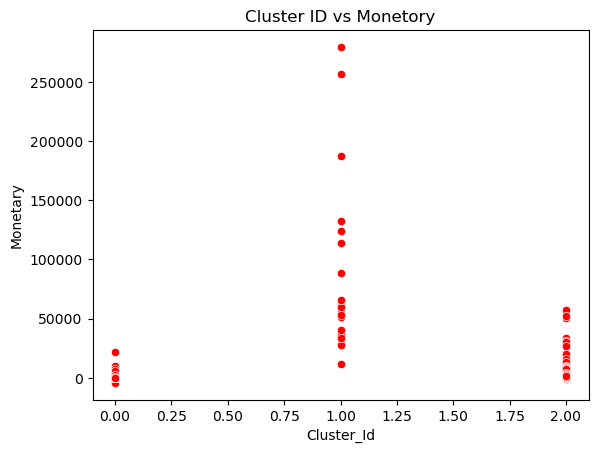

In [175]:
sns.scatterplot(x='Cluster_Id', y='Monetary', data=rfm1,color='red')
plt.title('Cluster ID vs Monetory')
plt.show()

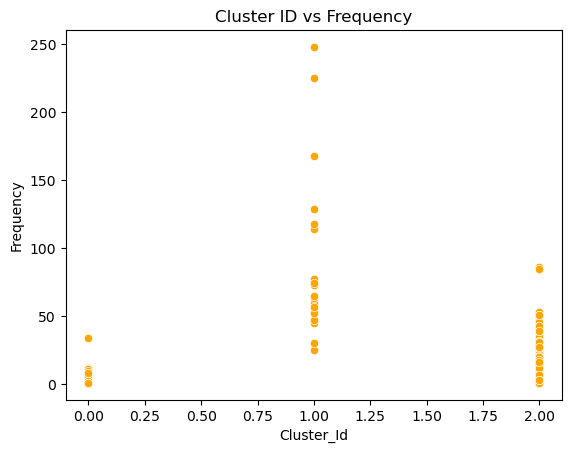

In [176]:
# Box plot to visualize Cluster Id vs Frequency

sns.scatterplot(x='Cluster_Id', y='Frequency', data=rfm1,color='orange')
plt.title('Cluster ID vs Frequency')
plt.show()

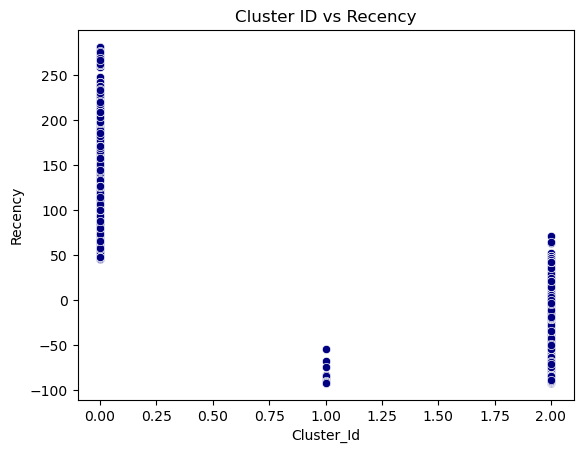

In [177]:
# Box plot to visualize Cluster Id vs Recency

sns.scatterplot(x='Cluster_Id', y='Recency', data=rfm1,color='navy')
plt.title('Cluster ID vs Recency')
plt.show()

# Hierarchical Clustering

In [178]:
from scipy.cluster.hierarchy import linkage, dendrogram,cophenet
from scipy.spatial.distance import pdist

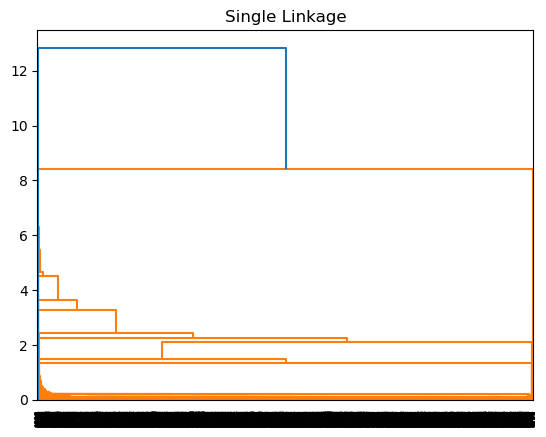

In [179]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.title('Single Linkage')
plt.show()

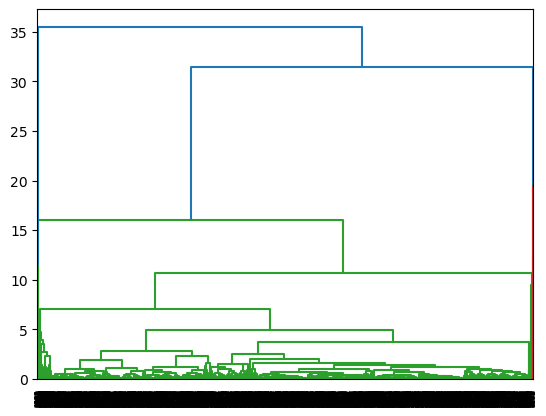

In [149]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title('Complete')
plt.show()

In [156]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
# Assign cluster labels

rfm1['Cluster_Labels'] = cluster_labels
rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment,Cluster_Id,Cluster_Labels
CustomerID,,,,,,,,,,
12346.0,233,2,0.00,1,2,1,121,Hibernating,1,0
12347.0,-90,7,4310.00,5,4,5,545,Champions,0,0
12348.0,-17,4,1797.24,2,3,4,234,At Risk,0,0
12349.0,-74,1,1757.55,4,1,4,414,Promising,0,0
12350.0,218,1,334.40,1,1,2,112,Hibernating,1,0


Text(0.5, 1.0, 'Cluster label vs Monetory')

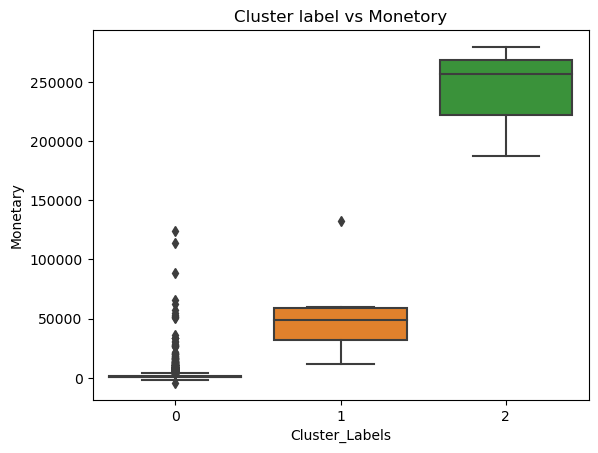

In [162]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Monetary', data=rfm1)
plt.title('Cluster label vs Monetory')

Text(0.5, 1.0, 'Cluster label vs Frequency')

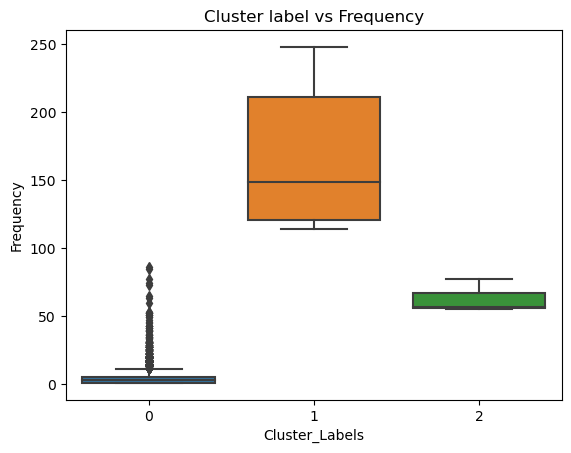

In [163]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm1)
plt.title('Cluster label vs Frequency')

Text(0.5, 1.0, 'Cluster label vs Recency')

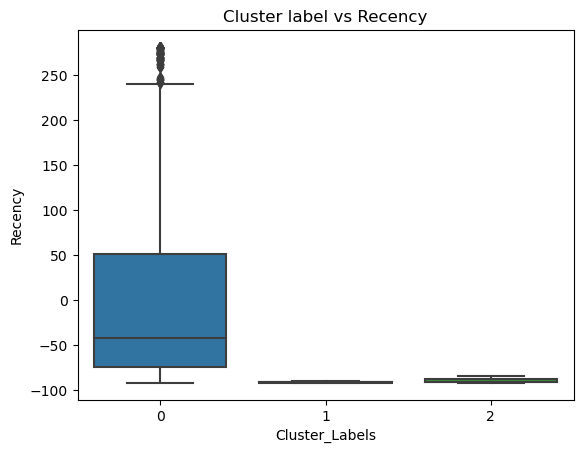

In [165]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm1)
plt.title('Cluster label vs Recency')

# Step 5 : Final Analysis
Inference: K-Means Clustering with 3 Cluster Ids

--Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.

--Customers with Cluster Id 1 are frequent buyers.

--Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

--Hierarchical Clustering with 3 Cluster Labels

--Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.

--Customers with Cluster_Labels 2 are frequent buyers.

--Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view